In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 9.5 MB 35.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Importing Dataset
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df_raw = pd.read_csv(url)

In [3]:
print("Shape of Data Frame is ------>",df_raw.shape)

Shape of Data Frame is ------> (115670, 62)


# Predictions of Deaths - Time Series Algorithms

## India

In [ ]:
#Load data for India
df_India = df_raw[df_raw.location == 'India']
df_India = df_India[["date","new_deaths"]]
df_India = df_India.dropna()
df_India.shape
df_India.isnull()

,date,new_deaths
47796,False,False
47797,False,False
47798,False,False
47799,False,False
47800,False,False
...,...,...
48338,False,False
48339,False,False
48340,False,False
48341,False,False


In [ ]:
# setting the index as date
df_India['date'] = pd.to_datetime(df_India.date,format='%Y-%m-%d')
df_India.Month = pd.to_datetime(df_India.date)
df_India = df_India.set_index("date")
df_India['new_deaths'] = df_India['new_deaths'].astype(int)
df_India.tail()


,new_deaths
date,
2021-09-04,308
2021-09-05,219
2021-09-06,290
2021-09-07,369
2021-09-08,338


## ARIMA

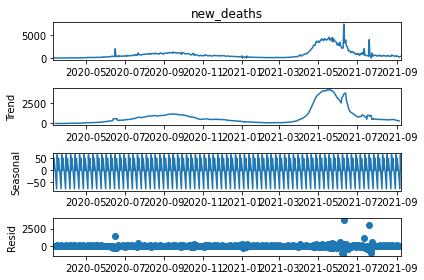

In [ ]:
#checking if the data is seasonal or not
result_India = seasonal_decompose(df_India['new_deaths'], model='additive')  
result_India.plot();

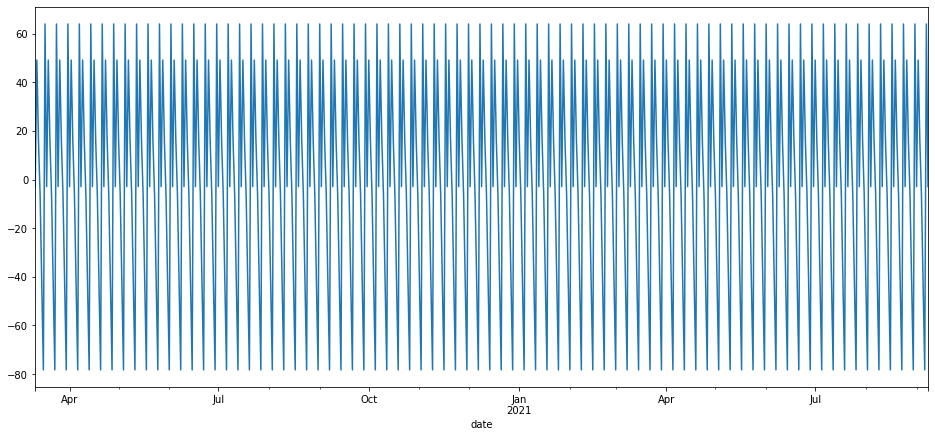

In [ ]:
plt.figure(figsize = (16,7))
result_India.seasonal.plot();

In [ ]:
#finding the parameters p,d,q,P,D,Q using auto_arima
auto_arima(df_India['new_deaths'], seasonal=True, m=7,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  547
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 3)   Log Likelihood               -3955.671
Date:                             Thu, 09 Sep 2021   AIC                           7925.342
Time:                                     22:35:30   BIC                           7955.460
Sample:                                          0   HQIC                          7937.115
                                             - 547                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8810      0.070    -12.574      0.000      -1.018      -0.744
ar.L2          0.1023      0.049      2.081      0.037       0.006       0.199
ma.L1          0.2823      0.073      3.880      0.000       0.140       0.425
ma.L2         -0.6606      0.041    -16.136      0.000      -0.741      -0.580
ar.S.L3        0.7988      0.110      7.288      0.000       0.584       1.014
ma.S.L3       -0.7127      0.122     -5.842      0.000      -0.952      -0.474
sigma2      1.184e+05   1769.469     66.927      0.000    1.15e+05    1.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            276917.81
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              13.65   Skew:                             7.77
Prob(H) (two-sided):                  0.00   Kurtosis:                       112.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#split the dataset
train_data_India = df_India[:len(df_India)-28]
test_data_India = df_India[len(df_India)-28:]
arima_model_India = SARIMAX(train_data_India['new_deaths'], order = (2,1,2), seasonal_order = (1,0,[1],3))
arima_result_India = arima_model_India.fit()
arima_result_India.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          new_deaths   No. Observations:                  519
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 3)   Log Likelihood               -3764.883
Date:                             Thu, 09 Sep 2021   AIC                           7543.765
Time:                                     22:35:59   BIC                           7573.515
Sample:                                 03-11-2020   HQIC                          7555.421
                                      - 08-11-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8895      0.072    -12.278      0.000      -1.032      -0.748
ar.L2          0.1001      0.052      1.918      0.055      -0.002       0.202
ma.L1          0.2961      0.075      3.932      0.000       0.148       0.444
ma.L2         -0.6600      0.042    -15.594      0.000      -0.743      -0.577
ar.S.L3        0.7912      0.126      6.298      0.000       0.545       1.037
ma.S.L3       -0.7060      0.139     -5.095      0.000      -0.978      -0.434
sigma2      1.244e+05   1940.401     64.107      0.000    1.21e+05    1.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            243052.02
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              13.68   Skew:                             7.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       108.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#obtaining Prediction values from ARIMA model
arima_pred_India = arima_result_India.predict(start = len(train_data_India), end = len(df_India)-1, typ="levels").rename("ARIMA Predictions")
arima_pred_India = arima_pred_India.astype(int)
arima_pred_India

2021-08-12    361
2021-08-13    527
2021-08-14    370
2021-08-15    496
2021-08-16    380
2021-08-17    498
2021-08-18    357
2021-08-19    503
2021-08-20    361
2021-08-21    483
2021-08-22    367
2021-08-23    484
2021-08-24    353
2021-08-25    487
2021-08-26    356
2021-08-27    474
2021-08-28    361
2021-08-29    474
2021-08-30    352
2021-08-31    475
2021-09-01    354
2021-09-02    467
2021-09-03    358
2021-09-04    467
2021-09-05    353
2021-09-06    467
2021-09-07    354
2021-09-08    462
Freq: D, Name: ARIMA Predictions, dtype: int64

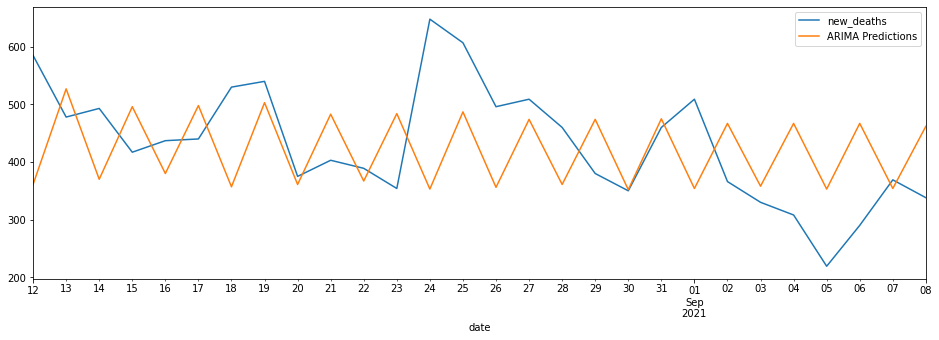

In [ ]:
#plotting graphs of actual data vs arima predicted values
test_data_India['new_deaths'].plot(figsize = (16,5), legend=True)
arima_pred_India.plot(legend = True);


In [ ]:
#evaluating the predicted model by calculating RSME and MSE values
arima_rmse_error_India = rmse(test_data_India['new_deaths'], arima_pred_India)
arima_mse_error_India = arima_rmse_error_India**2
mean_value_India = df_India['new_deaths'].mean()

print(f'MSE Error: {arima_mse_error_India}\nRMSE Error: {arima_rmse_error_India}\nMean: {mean_value_India}')

test_data_India['ARIMA_Predictions'] = arima_pred_India

MSE Error: 14361.82142857143
RMSE Error: 119.8408170389848
Mean: 807.5850091407679


## LSTM

In [ ]:
#scale the train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_India)
scaled_train_data_India = scaler.transform(train_data_India)
scaled_test_data_India = scaler.transform(test_data_India)

### Before creating LSTM model we should create a Time Series Generator object.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input_India = 12
n_features_India= 1
generator_India = TimeseriesGenerator(scaled_train_data_India, scaled_train_data_India, length=n_input_India, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model_India = Sequential()
lstm_model_India.add(LSTM(200, activation='relu', input_shape=(n_input_India, n_features_India)))
lstm_model_India.add(Dense(1))
lstm_model_India.compile(optimizer='adam', loss='mse')

lstm_model_India.summary()

lstm_model_India.fit_generator(generator_India,epochs=30)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
507/507 [==============================] - 6s 10ms/step - loss: 0.0038
Epoch 2/30
507/507 [==============================] - 5s 10ms/step - loss: 0.0033
Epoch 3/30
507/507 [==============================] - 5s 10ms/step - loss: 0.0039
Epoch 4/30
507/507 [==============================] - 5s 10ms/step - loss: 0.0027
Epoch 5/30
507/507 [==============================] - 5s 10ms/step - loss: 0.0027
Epoch 6/30
507/507 [==============================] - 5s 10ms/step - loss: 0.0025
Epoch 7/30
507/507

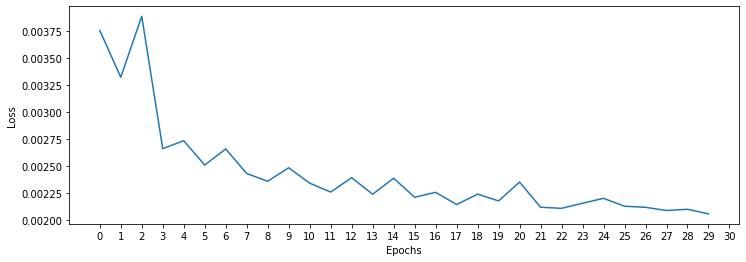

In [ ]:
losses_lstm_India = lstm_model_India.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,51,1))
plt.plot(range(len(losses_lstm_India)),losses_lstm_India);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data_India[-n_input_India:]
current_batch = batch.reshape((1, n_input_India, n_features_India))

for i in range(len(test_data_India)):   
    lstm_pred_India = lstm_model_India.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred_India) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_India]],axis=1)

# scaled the data that’s why we have to inverse it to see true predictions.

lstm_predictions_India = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions_India = lstm_predictions_India.astype(int)
lstm_predictions_India

array([[476],
       [476],
       [477],
       [478],
       [480],
       [481],
       [482],
       [484],
       [486],
       [487],
       [489],
       [490],
       [492],
       [494],
       [496],
       [497],
       [499],
       [501],
       [503],
       [505],
       [508],
       [510],
       [512],
       [515],
       [517],
       [520],
       [522],
       [525]])

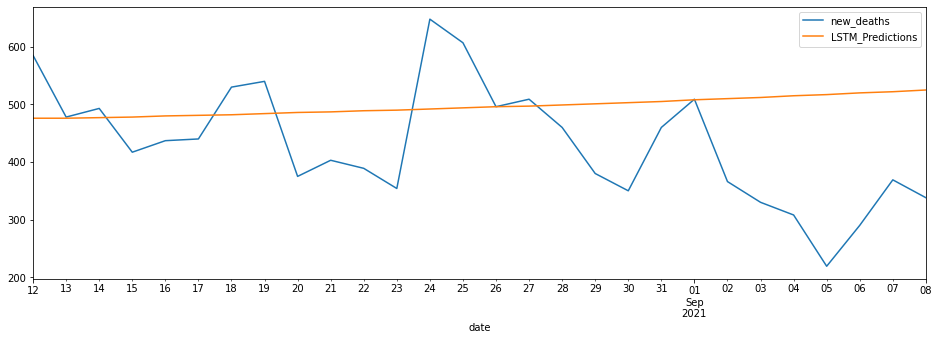

In [ ]:
test_data_India['LSTM_Predictions'] = lstm_predictions_India

test_data_India['new_deaths'].plot(figsize = (16,5), legend=True)
test_data_India['LSTM_Predictions'].plot(legend = True);

In [ ]:

lstm_rmse_error_India = rmse(test_data_India['new_deaths'], test_data_India["LSTM_Predictions"])
lstm_mse_error_India = lstm_rmse_error_India**2
mean_value_India = df_India['new_deaths'].mean()

print(f'MSE Error: {lstm_mse_error_India}\nRMSE Error: {lstm_rmse_error_India}\nMean: {mean_value_India}')

test_data_India['LSTM_Predictions'] = lstm_predictions_India

MSE Error: 16012.214285714288
RMSE Error: 126.53937839943062
Mean: 807.5850091407679


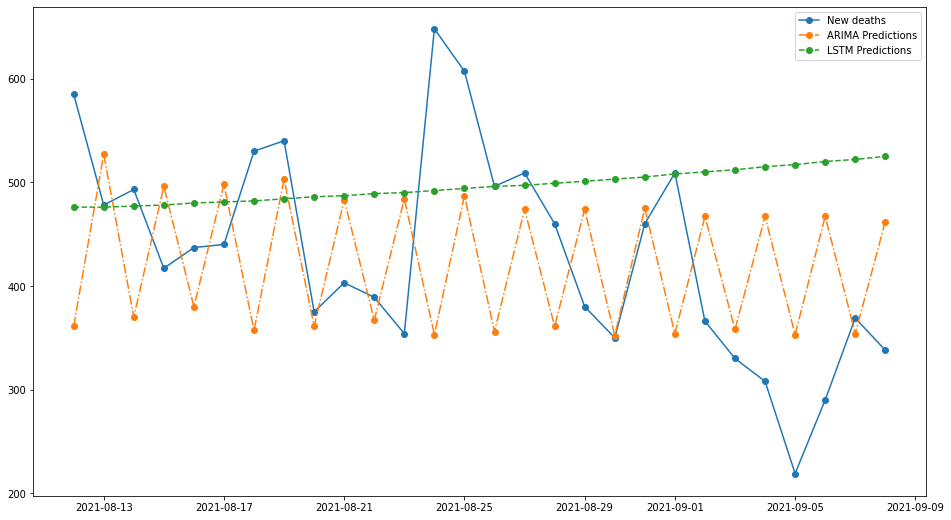

In [ ]:
rmse_errors_India = [arima_rmse_error_India, lstm_rmse_error_India]
mse_errors_India = [arima_mse_error_India, lstm_mse_error_India]
errors_India = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors_India, "MSE Errors" : mse_errors_India})
plt.figure(figsize=(16,9))
plt.plot_date(test_data_India.index, test_data_India["new_deaths"], linestyle="-",label="New deaths")
plt.plot_date(test_data_India.index, test_data_India["ARIMA_Predictions"], linestyle="-.",label="ARIMA Predictions")
plt.plot_date(test_data_India.index, test_data_India["LSTM_Predictions"], linestyle="--",label="LSTM Predictions")
plt.legend()
plt.show()

In [ ]:
print(f"Mean: {test_data_India['new_deaths'].mean()}")
errors_India

Mean: 431.42857142857144


,Models,RMSE Errors,MSE Errors
0,ARIMA,119.840817,14361.821429
1,LSTM,126.539378,16012.214286


In [ ]:
test_data_India

,new_deaths,ARIMA_Predictions,LSTM_Predictions
date,,,
2021-08-12,585,361,476
2021-08-13,478,527,476
2021-08-14,493,370,477
2021-08-15,417,496,478
2021-08-16,437,380,480
2021-08-17,440,498,481
2021-08-18,530,357,482
2021-08-19,540,503,484
2021-08-20,375,361,486


## Peru

In [ ]:
#Load data for Peru
df_Peru = df_raw[df_raw.location == 'Peru']
df_Peru = df_Peru[["date","new_deaths"]]
df_Peru = df_Peru.dropna()
df_Peru.shape
df_Peru.isnull()

# setting the index as date
df_Peru['date'] = pd.to_datetime(df_Peru.date,format='%Y-%m-%d')
df_Peru.Month = pd.to_datetime(df_Peru.date)
df_Peru = df_Peru.set_index("date")
df_Peru['new_deaths'] = df_Peru['new_deaths'].astype(int)
df_Peru.tail()

,new_deaths
date,
2021-09-04,27
2021-09-05,41
2021-09-06,35
2021-09-07,45
2021-09-08,27


## ARIMA

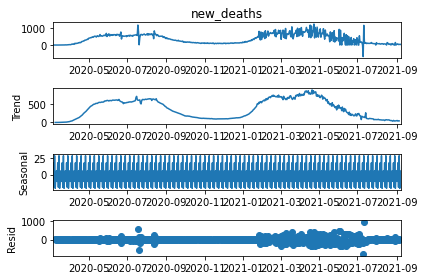

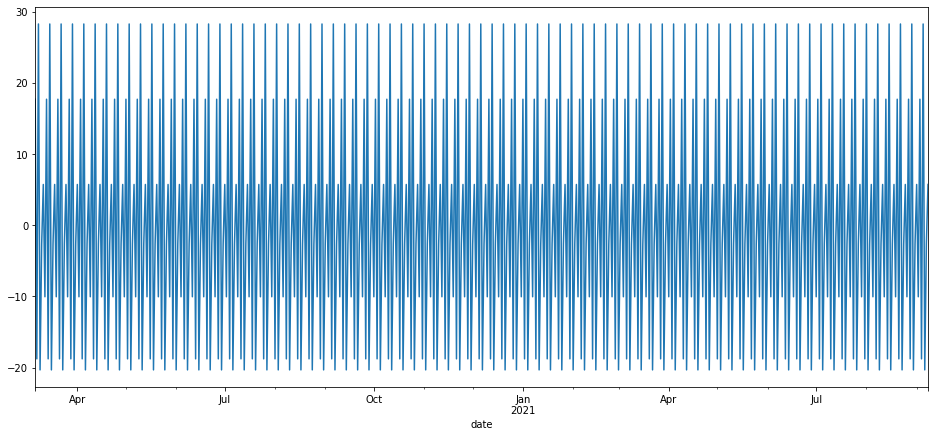

In [ ]:
#checking if the data is seasonal or not
result_Peru = seasonal_decompose(df_Peru['new_deaths'], model='additive')  
result_Peru.plot();
plt.figure(figsize = (16,7))
result_Peru.seasonal.plot();

In [ ]:
#finding the parameters p,d,q,P,D,Q using auto_arima
auto_arima(df_Peru['new_deaths'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  552
Model:             SARIMAX(1, 1, 3)x(1, 0, [], 12)   Log Likelihood               -3444.302
Date:                             Thu, 09 Sep 2021   AIC                           6900.605
Time:                                     23:48:52   BIC                           6926.475
Sample:                                          0   HQIC                          6910.714
                                             - 552                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9489      0.020     48.329      0.000       0.910       0.987
ma.L1         -2.3010      0.032    -71.608      0.000      -2.364      -2.238
ma.L2          1.7396      0.058     30.218      0.000       1.627       1.852
ma.L3         -0.4169      0.030    -13.933      0.000      -0.476      -0.358
ar.S.L12      -0.0841      0.035     -2.393      0.017      -0.153      -0.015
sigma2      1.565e+04    419.101     37.346      0.000    1.48e+04    1.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2444.06
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.63   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#split the dataset
train_data_Peru = df_Peru[:len(df_Peru)-28]
test_data_Peru = df_Peru[len(df_Peru)-28:]
arima_model_Peru = SARIMAX(train_data_Peru['new_deaths'], order = (1,1,3), seasonal_order = (1,0,[],12))
arima_result_Peru = arima_model_Peru.fit()
arima_result_Peru.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          new_deaths   No. Observations:                  524
Model:             SARIMAX(1, 1, 3)x(1, 0, [], 12)   Log Likelihood               -3281.685
Date:                             Fri, 10 Sep 2021   AIC                           6575.369
Time:                                     00:27:11   BIC                           6600.927
Sample:                                 03-06-2020   HQIC                          6585.379
                                      - 08-11-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9490      0.021     46.121      0.000       0.909       0.989
ma.L1         -2.3013      0.034    -68.337      0.000      -2.367      -2.235
ma.L2          1.7403      0.060     28.848      0.000       1.622       1.859
ma.L3         -0.4174      0.031    -13.307      0.000      -0.479      -0.356
ar.S.L12      -0.0850      0.037     -2.307      0.021      -0.157      -0.013
sigma2      1.641e+04    461.507     35.552      0.000    1.55e+04    1.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2082.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.93   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#obtaining Prediction values from ARIMA model
arima_pred_Peru = arima_result_Peru.predict(start = len(train_data_Peru), end = len(df_Peru)-1, typ="levels").rename("ARIMA Predictions")
arima_pred_Peru = arima_pred_Peru.astype(int)
arima_pred_Peru

2021-08-12    74
2021-08-13    66
2021-08-14    65
2021-08-15    65
2021-08-16    65
2021-08-17    63
2021-08-18    65
2021-08-19    65
2021-08-20    63
2021-08-21    62
2021-08-22    62
2021-08-23    65
2021-08-24    62
2021-08-25    62
2021-08-26    62
2021-08-27    62
2021-08-28    61
2021-08-29    61
2021-08-30    61
2021-08-31    61
2021-09-01    61
2021-09-02    60
2021-09-03    60
2021-09-04    60
2021-09-05    60
2021-09-06    60
2021-09-07    60
2021-09-08    59
Freq: D, Name: ARIMA Predictions, dtype: int64

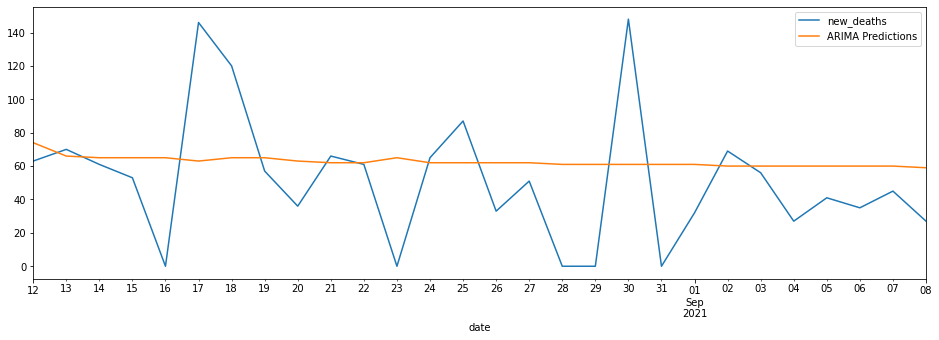

In [ ]:
#plotting graphs of actual data vs arima predicted values
test_data_Peru['new_deaths'].plot(figsize = (16,5), legend=True)
arima_pred_Peru.plot(legend = True);

In [ ]:
#evaluating the predicted model by calculating RSME and MSE values
arima_rmse_error_Peru = rmse(test_data_Peru['new_deaths'], arima_pred_Peru)
arima_mse_error_Peru = arima_rmse_error_Peru**2
mean_value_Peru = df_Peru['new_deaths'].mean()

print(f'MSE Error: {arima_mse_error_Peru}\nRMSE Error: {arima_rmse_error_Peru}\nMean: {mean_value_Peru}')

test_data_Peru['ARIMA_Predictions'] = arima_pred_Peru

MSE Error: 1573.6071428571427
RMSE Error: 39.668717433982444
Mean: 359.7735507246377


### LSTM

In [ ]:
#scale the train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_Peru)
scaled_train_data_Peru = scaler.transform(train_data_Peru)
scaled_test_data_Peru = scaler.transform(test_data_Peru)

from keras.preprocessing.sequence import TimeseriesGenerator

n_input_Peru = 12
n_features_Peru= 1
generator_Peru = TimeseriesGenerator(scaled_train_data_Peru, scaled_train_data_Peru, length=n_input_Peru, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model_Peru = Sequential()
lstm_model_Peru.add(LSTM(200, activation='relu', input_shape=(n_input_Peru, n_features_Peru)))
lstm_model_Peru.add(Dense(1))
lstm_model_Peru.compile(optimizer='adam', loss='mse')

lstm_model_Peru.summary()

lstm_model_Peru.fit_generator(generator_Peru,epochs=30)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
512/512 [==============================] - 7s 12ms/step - loss: 0.0124
Epoch 2/30
512/512 [==============================] - 6s 11ms/step - loss: 0.0085
Epoch 3/30
512/512 [==============================] - 6s 11ms/step - loss: 0.0074
Epoch 4/30
512/512 [==============================] - 6s 11ms/step - loss: 0.0074
Epoch 5/30
512/512 [==============================] - 6s 12ms/step - loss: 0.0076
Epoch 6/30
512/512 [==============================] - 6s 11ms/step - loss: 0.0070
Epoch 7/30
512/512 [

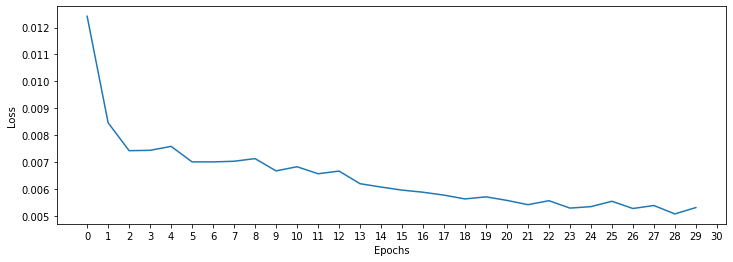

In [ ]:
losses_lstm_Peru = lstm_model_Peru.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,51,1))
plt.plot(range(len(losses_lstm_Peru)),losses_lstm_Peru);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data_Peru[-n_input_Peru:]
current_batch = batch.reshape((1, n_input_Peru, n_features_Peru))

for i in range(len(test_data_Peru)):   
    lstm_pred_Peru = lstm_model_Peru.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred_Peru) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_Peru]],axis=1)

# scaled our data that’s why we have to inverse it to see true predictions.

lstm_predictions_Peru = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions_Peru = lstm_predictions_Peru.astype(int)
lstm_predictions_Peru


test_data_Peru['LSTM_Predictions'] = lstm_predictions_Peru

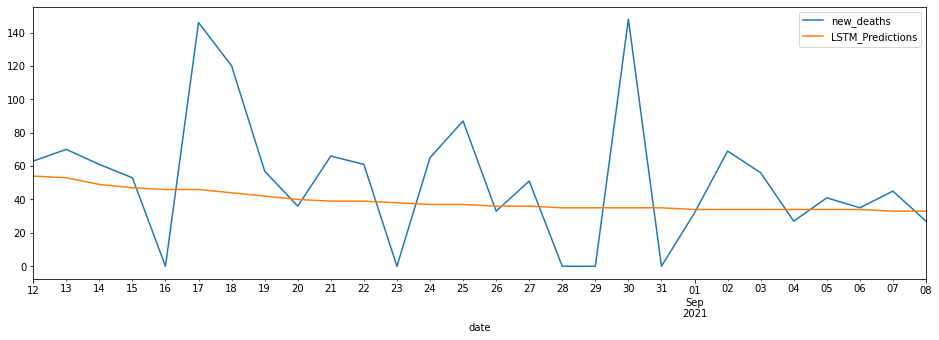

In [ ]:
test_data_Peru['new_deaths'].plot(figsize = (16,5), legend=True)
test_data_Peru['LSTM_Predictions'].plot(legend = True);


In [ ]:
#evaluating the predicted model by calculating RSME and MSE values
lstm_rmse_error_Peru = rmse(test_data_Peru['new_deaths'], test_data_Peru["LSTM_Predictions"])
lstm_mse_error_Peru = lstm_rmse_error_Peru**2
mean_value_Peru = df_Peru['new_deaths'].mean()

print(f'MSE Error: {lstm_mse_error_Peru}\nRMSE Error: {lstm_rmse_error_Peru}\nMean: {mean_value_Peru}')

test_data_Peru['LSTM_Predictions'] = lstm_predictions_Peru

MSE Error: 1546.2142857142856
RMSE Error: 39.32193135788584
Mean: 359.7735507246377


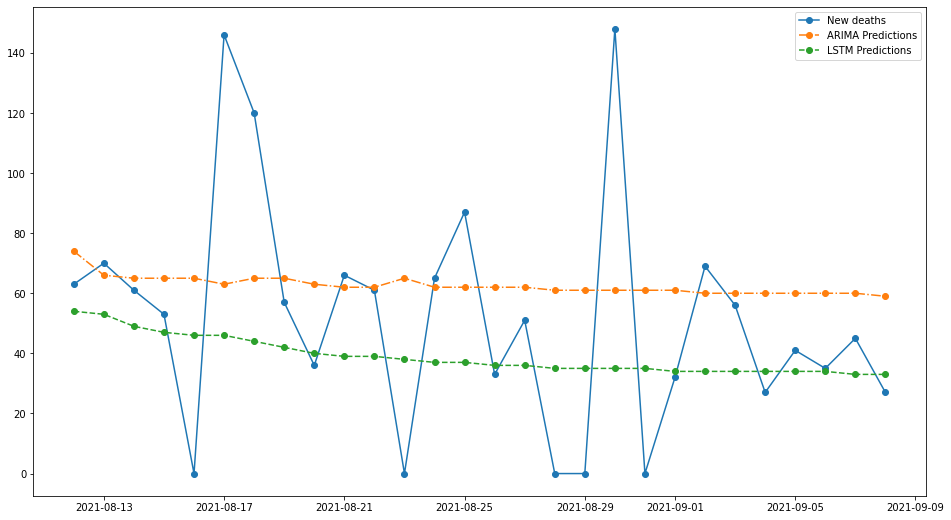

In [ ]:
rmse_errors_Peru = [arima_rmse_error_Peru, lstm_rmse_error_Peru]
mse_errors_Peru = [arima_mse_error_Peru, lstm_mse_error_Peru]
errors_Peru = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors_Peru, "MSE Errors" : mse_errors_Peru})
plt.figure(figsize=(16,9))
plt.plot_date(test_data_Peru.index, test_data_Peru["new_deaths"], linestyle="-",label="New deaths")
plt.plot_date(test_data_Peru.index, test_data_Peru["ARIMA_Predictions"], linestyle="-.",label="ARIMA Predictions")
plt.plot_date(test_data_Peru.index, test_data_Peru["LSTM_Predictions"], linestyle="--",label="LSTM Predictions")
plt.legend()
plt.show()


In [ ]:
print(f"Mean: {test_data_Peru['new_deaths'].mean()}")
errors_Peru



Mean: 51.75


,Models,RMSE Errors,MSE Errors
0,ARIMA,39.668717,1573.607143
1,LSTM,39.321931,1546.214286


In [ ]:
test_data_Peru

,new_deaths,ARIMA_Predictions,LSTM_Predictions
date,,,
2021-08-12,63,74,54
2021-08-13,70,66,53
2021-08-14,61,65,49
2021-08-15,53,65,47
2021-08-16,0,65,46
2021-08-17,146,63,46
2021-08-18,120,65,44
2021-08-19,57,65,42
2021-08-20,36,63,40


## Brazil

##ARIMA

In [ ]:
#Load data for Brazil
df_Brazil = df_raw[df_raw.location == 'Brazil']
df_Brazil = df_Brazil[["date","new_deaths"]]
df_Brazil = df_Brazil.dropna()
df_Brazil.shape
df_Brazil.isnull()

# setting the index as date
df_Brazil['date'] = pd.to_datetime(df_Brazil.date,format='%Y-%m-%d')
df_Brazil.Month = pd.to_datetime(df_Brazil.date)
df_Brazil = df_Brazil.set_index("date")
df_Brazil['new_deaths'] = df_Brazil['new_deaths'].astype(int)
df_Brazil.tail()

,new_deaths
date,
2021-09-04,692
2021-09-05,266
2021-09-06,182
2021-09-07,298
2021-09-08,313


## ARIMA

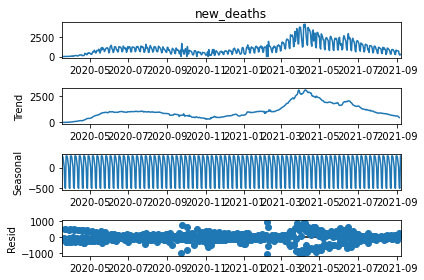

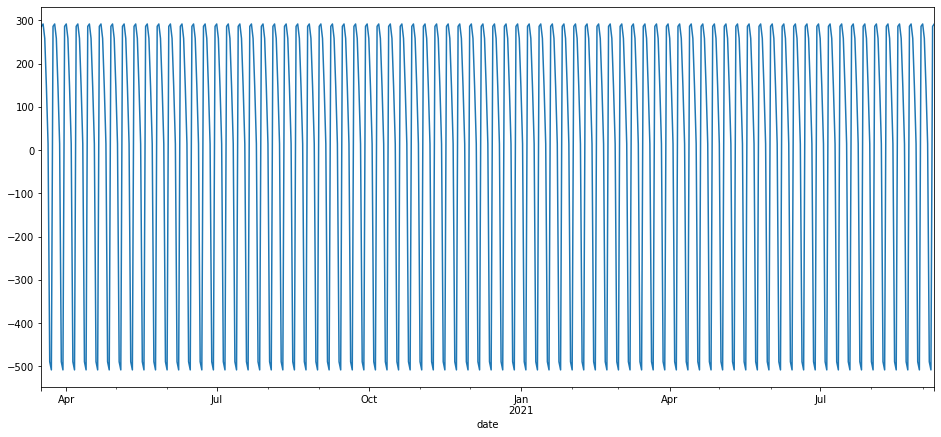

In [ ]:
#checking if the data is seasonal or not
result_Brazil = seasonal_decompose(df_Brazil['new_deaths'], model='additive')  
result_Brazil.plot();

plt.figure(figsize = (16,7))
result_Brazil.seasonal.plot();

In [ ]:
#finding the parameters p,d,q,P,D,Q using auto_arima
auto_arima(df_Brazil['new_deaths'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  541
Model:             SARIMAX(6, 1, 7)x(1, 0, [], 12)   Log Likelihood               -3775.046
Date:                             Fri, 10 Sep 2021   AIC                           7580.092
Time:                                     00:25:46   BIC                           7644.466
Sample:                                          0   HQIC                          7605.268
                                             - 541                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9175      0.039    -23.230      0.000      -0.995      -0.840
ar.L2         -0.9694      0.026    -37.425      0.000      -1.020      -0.919
ar.L3         -0.9457      0.036    -26.495      0.000      -1.016      -0.876
ar.L4         -0.9218      0.041    -22.652      0.000      -1.002      -0.842
ar.L5         -0.9679      0.026    -36.565      0.000      -1.020      -0.916
ar.L6         -0.8958      0.045    -20.079      0.000      -0.983      -0.808
ma.L1          0.1983      0.054      3.654      0.000       0.092       0.305
ma.L2          0.2706      0.042      6.505      0.000       0.189       0.352
ma.L3          0.1149      0.063      1.815      0.070      -0.009       0.239
ma.L4          0.1337      0.071      1.889      0.059      -0.005       0.272
ma.L5          0.1458      0.075      1.941      0.052      -0.001       0.293
ma.L6          0.1249      0.068      1.834      0.067      -0.009       0.258
ma.L7         -0.3975      0.057     -6.958      0.000      -0.509      -0.286
ar.S.L12       0.0854      0.056      1.512      0.130      -0.025       0.196
sigma2      7.524e+04   2885.525     26.076      0.000    6.96e+04    8.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               945.43
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               6.72   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#split the dataset
train_data_Brazil = df_Brazil[:len(df_Brazil)-28]
test_data_Brazil = df_Brazil[len(df_Brazil)-28:]
arima_model_Brazil = SARIMAX(train_data_Brazil['new_deaths'], order = (6,1,7), seasonal_order = (1,0,[],12))
arima_result_Brazil = arima_model_Brazil.fit()
arima_result_Brazil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          new_deaths   No. Observations:                  513
Model:             SARIMAX(6, 1, 7)x(1, 0, [], 12)   Log Likelihood               -3589.533
Date:                             Fri, 10 Sep 2021   AIC                           7209.065
Time:                                     00:27:47   BIC                           7272.640
Sample:                                 03-17-2020   HQIC                          7233.987
                                      - 08-11-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9185      0.042    -21.808      0.000      -1.001      -0.836
ar.L2         -0.9699      0.028    -34.738      0.000      -1.025      -0.915
ar.L3         -0.9479      0.038    -25.080      0.000      -1.022      -0.874
ar.L4         -0.9224      0.044    -21.062      0.000      -1.008      -0.837
ar.L5         -0.9707      0.028    -34.800      0.000      -1.025      -0.916
ar.L6         -0.8975      0.048    -18.750      0.000      -0.991      -0.804
ma.L1          0.1948      0.057      3.391      0.001       0.082       0.307
ma.L2          0.2613      0.045      5.839      0.000       0.174       0.349
ma.L3          0.1143      0.067      1.718      0.086      -0.016       0.245
ma.L4          0.1333      0.075      1.767      0.077      -0.015       0.281
ma.L5          0.1456      0.080      1.829      0.067      -0.010       0.302
ma.L6          0.1153      0.072      1.593      0.111      -0.027       0.257
ma.L7         -0.4151      0.061     -6.812      0.000      -0.534      -0.296
ar.S.L12       0.0878      0.059      1.489      0.136      -0.028       0.203
sigma2      7.848e+04   3156.956     24.860      0.000    7.23e+04    8.47e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               820.70
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               8.00   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#obtaining Prediction values from ARIMA model
arima_pred_Brazil = arima_result_Brazil.predict(start = len(train_data_Brazil), end = len(df_Brazil)-1, typ="levels").rename("ARIMA Predictions")
arima_pred_Brazil = arima_pred_Brazil.astype(int)
arima_pred_Brazil

2021-08-12    1038
2021-08-13     993
2021-08-14     892
2021-08-15     372
2021-08-16     400
2021-08-17    1100
2021-08-18    1122
2021-08-19    1020
2021-08-20     992
2021-08-21     890
2021-08-22     385
2021-08-23     399
2021-08-24    1076
2021-08-25    1125
2021-08-26     993
2021-08-27     992
2021-08-28     886
2021-08-29     389
2021-08-30     427
2021-08-31    1060
2021-09-01    1130
2021-09-02     978
2021-09-03     992
2021-09-04     883
2021-09-05     400
2021-09-06     439
2021-09-07    1046
2021-09-08    1131
Freq: D, Name: ARIMA Predictions, dtype: int64

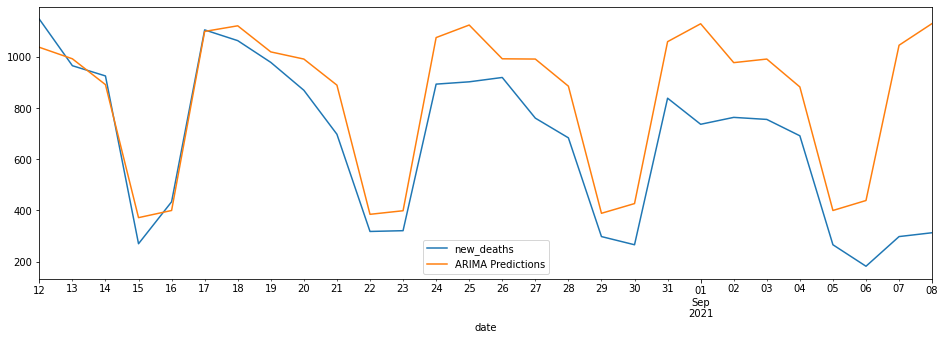

In [ ]:
#plotting graphs of actual data vs arima predicted values
test_data_Brazil['new_deaths'].plot(figsize = (16,5), legend=True)
arima_pred_Brazil.plot(legend = True);

In [ ]:
#evaluating the predicted model by calculating RSME and MSE values
arima_rmse_error_Brazil = rmse(test_data_Brazil['new_deaths'], arima_pred_Brazil)
arima_mse_error_Brazil = arima_rmse_error_Brazil**2
mean_value_Brazil = df_Brazil['new_deaths'].mean()

print(f'MSE Error: {arima_mse_error_Brazil}\nRMSE Error: {arima_rmse_error_Brazil}\nMean: {mean_value_Brazil}')

test_data_Brazil['ARIMA_Predictions'] = arima_pred_Brazil

MSE Error: 70105.24999999999
RMSE Error: 264.77396020001663
Mean: 1080.260628465804


## LSTM

In [ ]:
#scale the train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_Brazil)
scaled_train_data_Brazil = scaler.transform(train_data_Brazil)
scaled_test_data_Brazil = scaler.transform(test_data_Brazil)

#Before creating LSTM model we should create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input_Brazil = 12
n_features_Brazil= 1
generator_Brazil = TimeseriesGenerator(scaled_train_data_Brazil, scaled_train_data_Brazil, length=n_input_Brazil, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model_Brazil = Sequential()
lstm_model_Brazil.add(LSTM(200, activation='relu', input_shape=(n_input_Brazil, n_features_Brazil)))
lstm_model_Brazil.add(Dense(1))
lstm_model_Brazil.compile(optimizer='adam', loss='mse')

lstm_model_Brazil.summary()

lstm_model_Brazil.fit_generator(generator_Brazil,epochs=30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
501/501 [==============================] - 7s 11ms/step - loss: 0.0189
Epoch 2/30
501/501 [==============================] - 6s 11ms/step - loss: 0.0162
Epoch 3/30
501/501 [==============================] - 6s 11ms/step - loss: 0.0167
Epoch 4/30
501/501 [==============================] - 6s 12ms/step - loss: 0.0160
Epoch 5/30
501/501 [==============================] - 6s 12ms/step - loss: 0.0152
Epoch 6/30
501/501 [==============================] - 6s 12ms/step - loss: 0.0143
Epoch 7/30
501/501

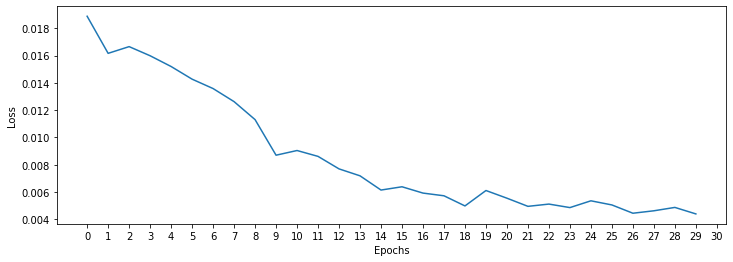

In [ ]:
losses_lstm_Brazil = lstm_model_Brazil.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,51,1))
plt.plot(range(len(losses_lstm_Brazil)),losses_lstm_Brazil);


In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data_Brazil[-n_input_Brazil:]
current_batch = batch.reshape((1, n_input_Brazil, n_features_Brazil))

for i in range(len(test_data_Brazil)):   
    lstm_pred_Brazil = lstm_model_Brazil.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred_Brazil) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_Brazil]],axis=1)

# scaled our data that’s why we have to inverse it to see true predictions.

lstm_predictions_Brazil = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions_Brazil = lstm_predictions_Brazil.astype(int)
lstm_predictions_Brazil

array([[1121],
       [1022],
       [ 820],
       [ 572],
       [ 545],
       [1053],
       [1123],
       [1063],
       [ 954],
       [ 750],
       [ 539],
       [ 661],
       [1053],
       [1073],
       [1009],
       [ 885],
       [ 674],
       [ 508],
       [ 704],
       [1046],
       [1014],
       [ 948],
       [ 818],
       [ 614],
       [ 497],
       [ 755],
       [ 996],
       [ 956]])

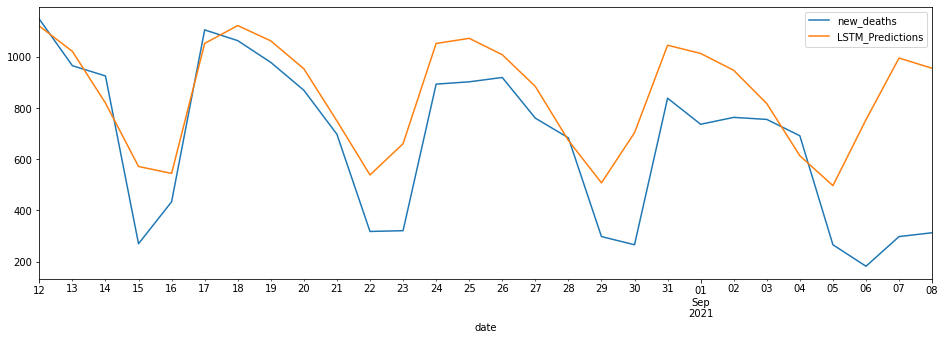

In [ ]:
test_data_Brazil['LSTM_Predictions'] = lstm_predictions_Brazil

test_data_Brazil['new_deaths'].plot(figsize = (16,5), legend=True)
test_data_Brazil['LSTM_Predictions'].plot(legend = True);

In [ ]:
#evaluating the predicted model by calculating RSME and MSE values
lstm_rmse_error_Brazil = rmse(test_data_Brazil['new_deaths'], test_data_Brazil["LSTM_Predictions"])
lstm_mse_error_Brazil = lstm_rmse_error_Brazil**2
mean_value_Brazil = df_Brazil['new_deaths'].mean()

print(f'MSE Error: {lstm_mse_error_Brazil}\nRMSE Error: {lstm_rmse_error_Brazil}\nMean: {mean_value_Brazil}')

test_data_Brazil['LSTM_Predictions'] = lstm_predictions_Brazil

MSE Error: 73764.28571428571
RMSE Error: 271.5958131383577
Mean: 1080.260628465804


In [51]:
rmse_errors_Brazil = [arima_rmse_error_Brazil, lstm_rmse_error_Brazil]
mse_errors_Brazil = [arima_mse_error_Brazil, lstm_mse_error_Brazil]
errors_Brazil = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors_Brazil, "MSE Errors" : mse_errors_Brazil})
plt.figure(figsize=(16,9))
plt.plot_date(test_data_Brazil.index, test_data_Brazil["new_deaths"], linestyle="-",label="New deaths")
plt.plot_date(test_data_Brazil.index, test_data_Brazil["ARIMA_Predictions"], linestyle="-.",label="ARIMA Predictions")
plt.plot_date(test_data_Brazil.index, test_data_Brazil["LSTM_Predictions"], linestyle="--",label="LSTM Predictions")
plt.xlabel("Dates")
plt.ylabel("New Death Counts")
plt.legend()
plt.show()



NameError: ignored

In [ ]:
print(f"Mean: {test_data_Brazil['new_deaths'].mean()}")
errors_Brazil

Mean: 666.8928571428571


,Models,RMSE Errors,MSE Errors
0,ARIMA,264.773960,70105.250000
1,LSTM,271.595813,73764.285714


In [ ]:
test_data_Brazil

,new_deaths,ARIMA_Predictions,LSTM_Predictions
date,,,
2021-08-12,1148,1038,1121
2021-08-13,966,993,1022
2021-08-14,926,892,820
2021-08-15,270,372,572
2021-08-16,434,400,545
2021-08-17,1106,1100,1053
2021-08-18,1064,1122,1123
2021-08-19,979,1020,1063
2021-08-20,870,992,954


## Mexico

In [6]:
#Load data for Mexico
df_Mexico = df_raw[df_raw.location == 'Mexico']
df_Mexico = df_Mexico[["date","new_deaths"]]
df_Mexico = df_Mexico.dropna()
df_Mexico.shape
df_Mexico.isnull()

# setting the index as date
df_Mexico['date'] = pd.to_datetime(df_Mexico.date,format='%Y-%m-%d')
df_Mexico.Month = pd.to_datetime(df_Mexico.date)
df_Mexico = df_Mexico.set_index("date")
df_Mexico['new_deaths'] = df_Mexico['new_deaths'].astype(int)
df_Mexico.tail()

,new_deaths
date,
2021-09-05,272
2021-09-06,330
2021-09-07,1071
2021-09-08,879
2021-09-09,730


## ARIMA

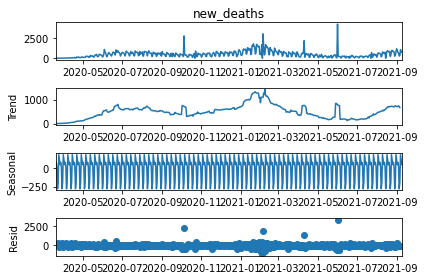

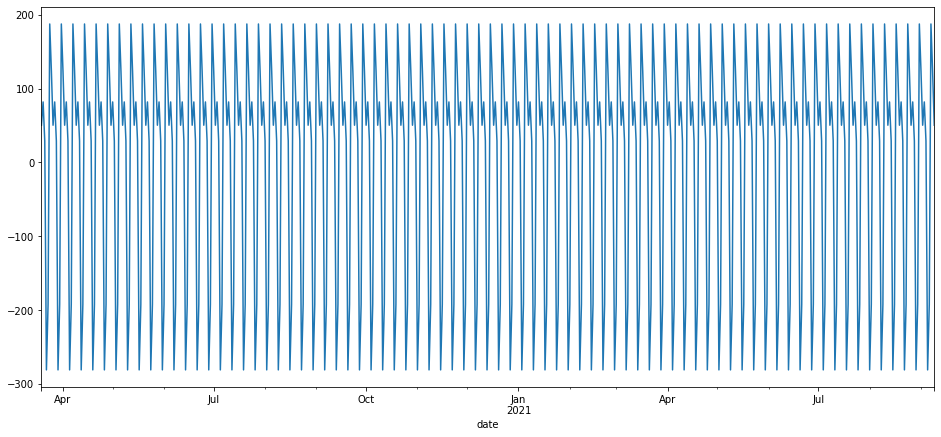

In [7]:
#checking if the data is seasonal or not
result_Mexico = seasonal_decompose(df_Mexico['new_deaths'], model='additive')  
result_Mexico.plot();

plt.figure(figsize = (16,7))
result_Mexico.seasonal.plot();

In [8]:
#finding the parameters p,d,q,P,D,Q using auto_arima
auto_arima(df_Mexico['new_deaths'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  540
Model:             SARIMAX(2, 1, 3)x(2, 0, [], 12)   Log Likelihood               -3868.243
Date:                             Fri, 10 Sep 2021   AIC                           7752.486
Time:                                     09:00:15   BIC                           7786.804
Sample:                                          0   HQIC                          7765.909
                                             - 540                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2434      0.011    108.889      0.000       1.221       1.266
ar.L2         -0.9881      0.014    -71.202      0.000      -1.015      -0.961
ma.L1         -2.0823      0.031    -66.385      0.000      -2.144      -2.021
ma.L2          1.9840      0.053     37.249      0.000       1.880       2.088
ma.L3         -0.8002      0.035    -22.666      0.000      -0.869      -0.731
ar.S.L12      -0.1206      0.060     -2.019      0.043      -0.238      -0.004
ar.S.L24       0.0625      0.075      0.833      0.405      -0.085       0.210
sigma2      1.149e+05   2041.977     56.270      0.000    1.11e+05    1.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):             92381.20
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               7.43   Skew:                             5.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
#split the dataset
train_data_Mexico = df_Mexico[:len(df_Mexico)-28]
test_data_Mexico = df_Mexico[len(df_Mexico)-28:]
arima_model_Mexico = SARIMAX(train_data_Mexico['new_deaths'], order = (2,1,3), seasonal_order = (2,0,[],12))
arima_result_Mexico = arima_model_Mexico.fit()
arima_result_Mexico.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          new_deaths   No. Observations:                  512
Model:             SARIMAX(2, 1, 3)x(2, 0, [], 12)   Log Likelihood               -3692.270
Date:                             Fri, 10 Sep 2021   AIC                           7400.541
Time:                                     09:12:31   BIC                           7434.432
Sample:                                 03-19-2020   HQIC                          7413.827
                                      - 08-12-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0013      0.292      3.433      0.001       0.430       1.573
ar.L2         -0.2084      0.277     -0.753      0.451      -0.751       0.334
ma.L1         -1.8479      0.290     -6.382      0.000      -2.415      -1.280
ma.L2          0.9256      0.551      1.679      0.093      -0.155       2.006
ma.L3         -0.0423      0.269     -0.157      0.875      -0.569       0.485
ar.S.L12      -0.1761      0.050     -3.505      0.000      -0.275      -0.078
ar.S.L24      -0.0636      0.051     -1.253      0.210      -0.163       0.036
sigma2      1.104e+05   1477.434     74.700      0.000    1.07e+05    1.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             60303.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.38   Skew:                             4.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        55.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#obtaining Prediction values from ARIMA model
arima_pred_Mexico = arima_result_Mexico.predict(start = len(train_data_Mexico), end = len(df_Mexico)-1, typ="levels").rename("ARIMA Predictions")
arima_pred_Mexico = arima_pred_Mexico.astype(int)
arima_pred_Mexico

2021-08-13    538
2021-08-14    512
2021-08-15    455
2021-08-16    508
2021-08-17    477
2021-08-18    533
2021-08-19    546
2021-08-20    592
2021-08-21    575
2021-08-22    497
2021-08-23    504
2021-08-24    527
2021-08-25    560
2021-08-26    558
2021-08-27    542
2021-08-28    536
2021-08-29    542
2021-08-30    535
2021-08-31    536
2021-09-01    550
2021-09-02    547
2021-09-03    528
2021-09-04    530
2021-09-05    534
2021-09-06    533
2021-09-07    535
2021-09-08    541
2021-09-09    539
Freq: D, Name: ARIMA Predictions, dtype: int64

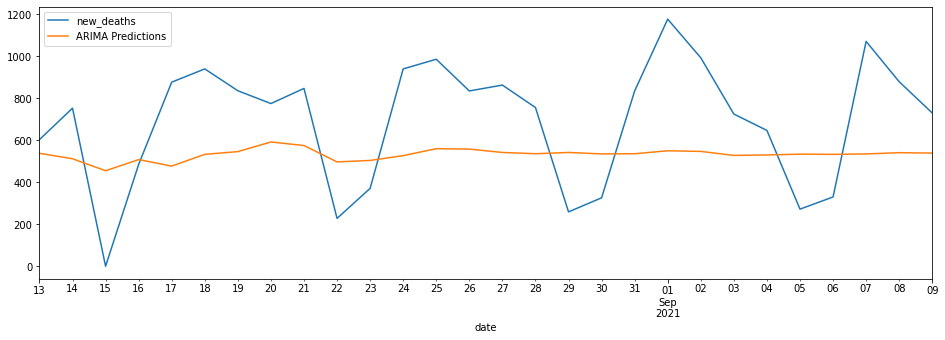

In [11]:
#plotting graphs of actual data vs arima predicted values
test_data_Mexico['new_deaths'].plot(figsize = (16,5), legend=True)
arima_pred_Mexico.plot(legend = True);

In [12]:
#evaluating the predicted model by calculating RSME and MSE values
arima_rmse_error_Mexico = rmse(test_data_Mexico['new_deaths'], arima_pred_Mexico)
arima_mse_error_Mexico = arima_rmse_error_Mexico**2
mean_value_Mexico = df_Mexico['new_deaths'].mean()

print(f'MSE Error: {arima_mse_error_Mexico}\nRMSE Error: {arima_rmse_error_Mexico}\nMean: {mean_value_Mexico}')

test_data_Mexico['ARIMA_Predictions'] = arima_pred_Mexico

MSE Error: 102247.67857142858
RMSE Error: 319.76190919405735
Mean: 492.8703703703704


## LSTM

In [13]:
#scale the train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_Mexico)
scaled_train_data_Mexico = scaler.transform(train_data_Mexico)
scaled_test_data_Mexico = scaler.transform(test_data_Mexico)

#Before creating LSTM model we should create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input_Mexico = 12
n_features_Mexico= 1
generator_Mexico = TimeseriesGenerator(scaled_train_data_Mexico, scaled_train_data_Mexico, length=n_input_Mexico, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model_Mexico = Sequential()
lstm_model_Mexico.add(LSTM(200, activation='relu', input_shape=(n_input_Mexico, n_features_Mexico)))
lstm_model_Mexico.add(Dense(1))
lstm_model_Mexico.compile(optimizer='adam', loss='mse')

lstm_model_Mexico.summary()

lstm_model_Mexico.fit_generator(generator_Mexico,epochs=30)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
500/500 [==============================] - 23s 39ms/step - loss: 0.0081
Epoch 2/30
500/500 [==============================] - 19s 38ms/step - loss: 0.0076
Epoch 3/30
500/500 [==============================] - 19s 38ms/step - loss: 0.0073
Epoch 4/30
500/500 [==============================] - 19s 39ms/step - loss: 0.0070
Epoch 5/30
500/500 [==============================] - 19s 38ms/step - loss: 0.0069
Epoch 6/30
500/500 [==============================] - 19s 38ms/step - loss: 0.0068
Epoch 7/30
500

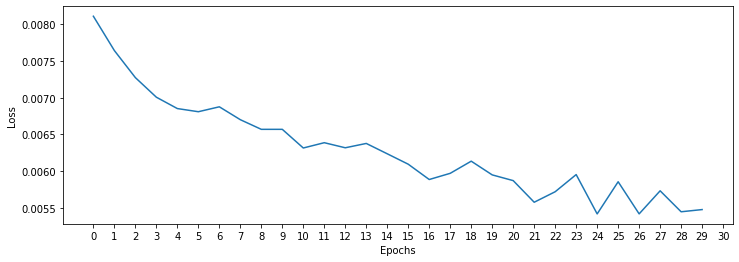

In [14]:
losses_lstm_Mexico = lstm_model_Mexico.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,51,1))
plt.plot(range(len(losses_lstm_Mexico)),losses_lstm_Mexico);

In [15]:
lstm_predictions_scaled = list()

batch = scaled_train_data_Mexico[-n_input_Mexico:]
current_batch = batch.reshape((1, n_input_Mexico, n_features_Mexico))

for i in range(len(test_data_Mexico)):   
    lstm_pred_Mexico = lstm_model_Mexico.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred_Mexico) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_Mexico]],axis=1)

# scaled the data that’s why we have to inverse it to see true predictions.

lstm_predictions_Mexico = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions_Mexico = lstm_predictions_Mexico.astype(int)
lstm_predictions_Mexico


array([[520],
       [419],
       [342],
       [395],
       [524],
       [563],
       [516],
       [437],
       [348],
       [290],
       [348],
       [419],
       [433],
       [404],
       [332],
       [263],
       [230],
       [279],
       [310],
       [310],
       [288],
       [225],
       [174],
       [172],
       [195],
       [215],
       [212],
       [181]])

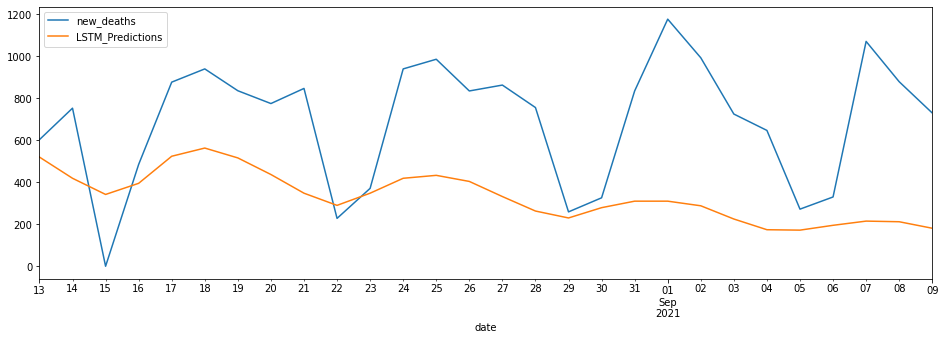

In [16]:
test_data_Mexico['LSTM_Predictions'] = lstm_predictions_Mexico

test_data_Mexico['new_deaths'].plot(figsize = (16,5), legend=True)
test_data_Mexico['LSTM_Predictions'].plot(legend = True);

In [17]:
#evaluating the predicted model by calculating RSME and MSE values
lstm_rmse_error_Mexico = rmse(test_data_Mexico['new_deaths'], test_data_Mexico["LSTM_Predictions"])
lstm_mse_error_Mexico = lstm_rmse_error_Mexico**2
mean_value_Mexico = df_Mexico['new_deaths'].mean()

print(f'MSE Error: {lstm_mse_error_Mexico}\nRMSE Error: {lstm_rmse_error_Mexico}\nMean: {mean_value_Mexico}')

test_data_Mexico['LSTM_Predictions'] = lstm_predictions_Mexico


MSE Error: 206309.10714285713
RMSE Error: 454.21262327555047
Mean: 492.8703703703704


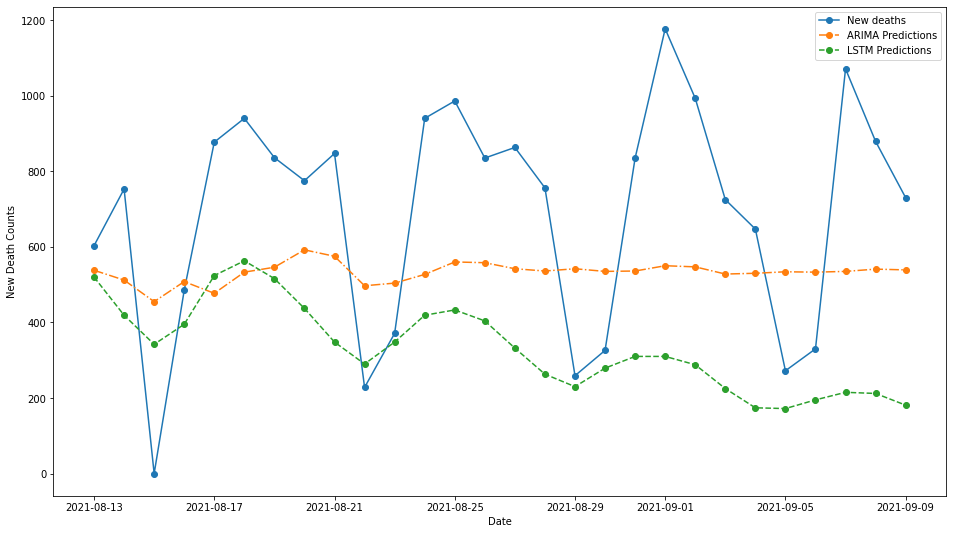

In [50]:
rmse_errors_Mexico = [arima_rmse_error_Mexico, lstm_rmse_error_Mexico]
mse_errors_Mexico = [arima_mse_error_Mexico, lstm_mse_error_Mexico]
errors_Mexico = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors_Mexico, "MSE Errors" : mse_errors_Mexico})
plt.figure(figsize=(16,9))
plt.plot_date(test_data_Mexico.index, test_data_Mexico["new_deaths"], linestyle="-",label="New deaths")
plt.plot_date(test_data_Mexico.index, test_data_Mexico["ARIMA_Predictions"], linestyle="-.",label="ARIMA Predictions")
plt.plot_date(test_data_Mexico.index, test_data_Mexico["LSTM_Predictions"], linestyle="--",label="LSTM Predictions")
plt.xlabel("Date")
plt.ylabel("New Death Counts")
plt.legend()
plt.show()

In [19]:
print(f"Mean: {test_data_Mexico['new_deaths'].mean()}")
errors_Mexico

Mean: 690.6785714285714


,Models,RMSE Errors,MSE Errors
0,ARIMA,319.761909,102247.678571
1,LSTM,454.212623,206309.107143


In [20]:
test_data_Mexico

,new_deaths,ARIMA_Predictions,LSTM_Predictions
date,,,
2021-08-13,603,538,520
2021-08-14,753,512,419
2021-08-15,0,455,342
2021-08-16,485,508,395
2021-08-17,877,477,524
2021-08-18,940,533,563
2021-08-19,836,546,516
2021-08-20,775,592,437
2021-08-21,847,575,348


## United states

In [21]:
#Load data for United States
df_United_States = df_raw[df_raw.location == 'United States']
df_United_States = df_United_States[["date","new_deaths"]]
df_United_States = df_United_States.dropna()
df_United_States.shape
df_United_States.isnull()

# setting the index as date
df_United_States['date'] = pd.to_datetime(df_United_States.date,format='%Y-%m-%d')
df_United_States.Month = pd.to_datetime(df_United_States.date)
df_United_States = df_United_States.set_index("date")
df_United_States['new_deaths'] = df_United_States['new_deaths'].astype(int)
df_United_States.tail()

,new_deaths
date,
2021-09-05,362
2021-09-06,530
2021-09-07,1513
2021-09-08,2146
2021-09-09,1926


## ARIMA

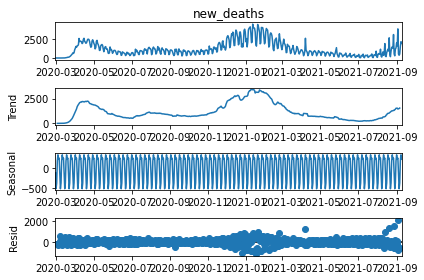

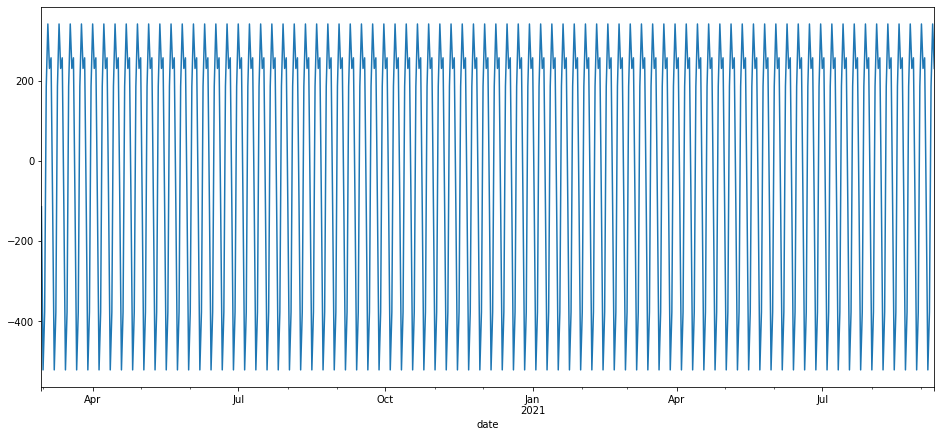

In [22]:
#checking if the data is seasonal or not
result_United_States = seasonal_decompose(df_United_States['new_deaths'], model='additive')  
result_United_States.plot();

plt.figure(figsize = (16,7))
result_United_States.seasonal.plot();

In [33]:
#finding the parameters p,d,q,P,D,Q using auto_arima
auto_arima(df_United_States['new_deaths'], seasonal=True, m=7,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  559
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood               -3932.335
Date:                            Fri, 10 Sep 2021   AIC                           7876.670
Time:                                    10:06:40   BIC                           7902.616
Sample:                                         0   HQIC                          7886.803
                                            - 559                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4370      2.049      0.213      0.831      -3.580       4.454
ar.L1          0.3473      0.046      7.473      0.000       0.256       0.438
ma.L1         -0.8323      0.033    -25.501      0.000      -0.896      -0.768
ar.S.L7        0.5825      0.024     24.310      0.000       0.536       0.629
ar.S.L14       0.3046      0.026     11.708      0.000       0.254       0.356
sigma2      7.606e+04   2287.836     33.245      0.000    7.16e+04    8.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1062.73
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#split the dataset
train_data_United_States = df_United_States[:len(df_United_States)-28]
test_data_United_States = df_United_States[len(df_United_States)-28:]
arima_model_United_States = SARIMAX(train_data_United_States['new_deaths'], order = (1,1,1), seasonal_order = (2,0,[],7))
arima_result_United_States = arima_model_United_States.fit()
arima_result_United_States.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         new_deaths   No. Observations:                  531
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood               -3728.850
Date:                            Fri, 10 Sep 2021   AIC                           7467.700
Time:                                    10:07:57   BIC                           7489.065
Sample:                                02-29-2020   HQIC                          7476.063
                                     - 08-12-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7213      0.020     36.777      0.000       0.683       0.760
ma.L1         -0.9989      0.011    -94.493      0.000      -1.020      -0.978
ar.S.L7        0.5375      0.026     21.037      0.000       0.487       0.588
ar.S.L14       0.3142      0.025     12.402      0.000       0.265       0.364
sigma2      7.443e+04   2190.991     33.972      0.000    7.01e+04    7.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   8.95   Jarque-Bera (JB):              1095.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
#obtaining Prediction values from ARIMA model
arima_pred_United_States = arima_result_United_States.predict(start = len(train_data_United_States), end = len(df_United_States)-1, typ="levels").rename("ARIMA Predictions")
arima_pred_United_States = arima_pred_United_States.astype(int)
arima_pred_United_States

2021-08-13    1113
2021-08-14     365
2021-08-15     272
2021-08-16     589
2021-08-17     783
2021-08-18     505
2021-08-19     665
2021-08-20    1116
2021-08-21     422
2021-08-22     337
2021-08-23     627
2021-08-24     825
2021-08-25     531
2021-08-26     704
2021-08-27    1099
2021-08-28     490
2021-08-29     415
2021-08-30     671
2021-08-31     838
2021-09-01     593
2021-09-02     736
2021-09-03    1090
2021-09-04     545
2021-09-05     478
2021-09-06     706
2021-09-07     858
2021-09-08     634
2021-09-09     765
Freq: D, Name: ARIMA Predictions, dtype: int64

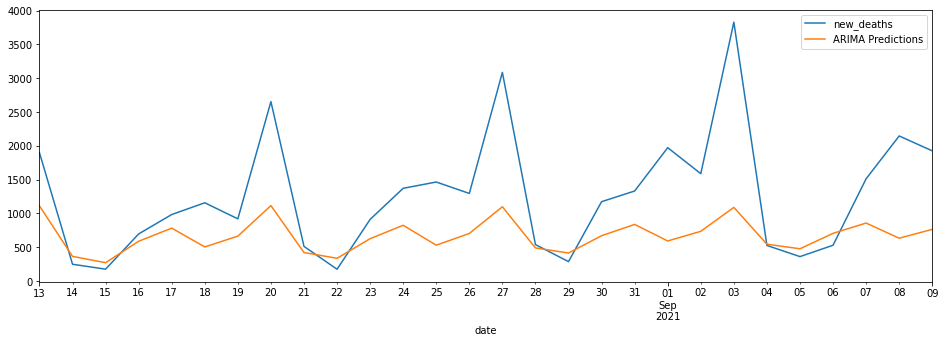

In [36]:
#plotting graphs of actual data vs arima predicted values
test_data_United_States['new_deaths'].plot(figsize = (16,5), legend=True)
arima_pred_United_States.plot(legend = True);

In [37]:
#evaluating the predicted model by calculating RSME and MSE values
arima_rmse_error_United_States = rmse(test_data_United_States['new_deaths'], arima_pred_United_States)
arima_mse_error_United_States = arima_rmse_error_United_States**2
mean_value_United_States = df_United_States['new_deaths'].mean()

print(f'MSE Error: {arima_mse_error_United_States}\nRMSE Error: {arima_rmse_error_United_States}\nMean: {mean_value_United_States}')



MSE Error: 853257.3214285715
RMSE Error: 923.7192871368289
Mean: 1170.989266547406


In [38]:
test_data_United_States['ARIMA_Predictions'] = arima_pred_United_States

## LSTM

In [41]:
#scale the train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_United_States)
scaled_train_data_United_States = scaler.transform(train_data_United_States)
scaled_test_data_United_States = scaler.transform(test_data_United_States)

#Before creating LSTM model we should create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input_United_States = 12
n_features_United_States= 1
generator_United_States = TimeseriesGenerator(scaled_train_data_United_States, scaled_train_data_United_States, length=n_input_United_States, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

lstm_model_United_States = Sequential()
lstm_model_United_States.add(LSTM(128, activation='relu', input_shape=(n_input_United_States, n_features_United_States)))
lstm_model_United_States.add(Dropout(0.2))
lstm_model_United_States.add(Dense(1))
lstm_model_United_States.compile(optimizer='adam', loss='mse')

lstm_model_United_States.summary()

lstm_model_United_States.fit_generator(generator_United_States,epochs=30)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
519/519 [==============================] - 23s 40ms/step - loss: 0.0205
Epoch 2/30
519/519 [==============================] - 21s 40ms/step - loss: 0.0158
Epoch 3/30
519/519 [==============================] - 21s 40ms/step - loss: 0.0142
Epoch 4/30
519/519 [==============================] - 21s 40ms/step - loss: 0.0137
Epoch 5/30
519/519 [============================

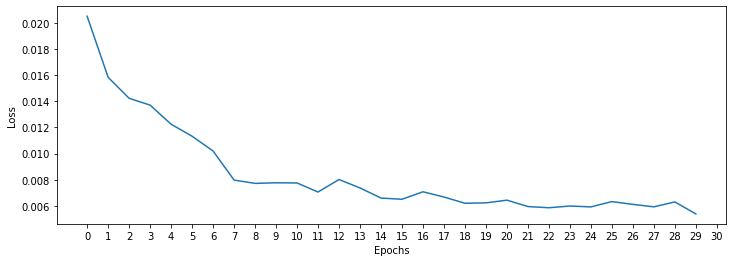

In [42]:
losses_lstm_United_States = lstm_model_United_States.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,51,1))
plt.plot(range(len(losses_lstm_United_States)),losses_lstm_United_States);

In [43]:
lstm_predictions_scaled = list()

batch = scaled_train_data_United_States[-n_input_United_States:]
current_batch = batch.reshape((1, n_input_United_States, n_features_United_States))

for i in range(len(test_data_United_States)):   
    lstm_pred_United_States = lstm_model_United_States.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred_United_States) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred_United_States]],axis=1)

# scaled the data that’s why we have to inverse it to see true predictions.

lstm_predictions_United_States = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions_United_States = lstm_predictions_United_States.astype(int)
lstm_predictions_United_States


test_data_United_States['LSTM_Predictions'] = lstm_predictions_United_States

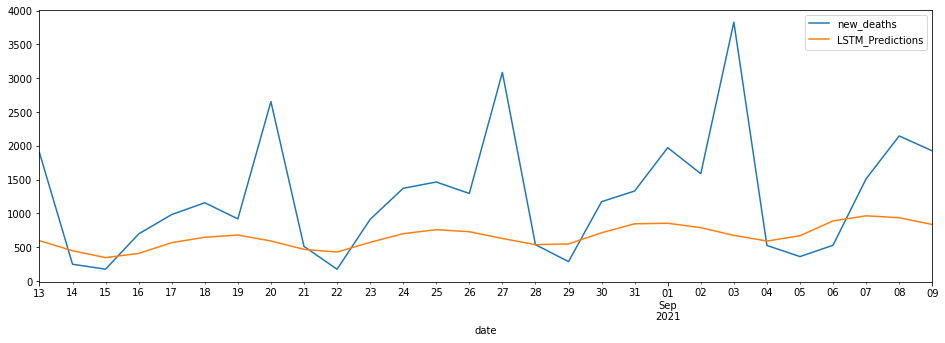

In [44]:
test_data_United_States['new_deaths'].plot(figsize = (16,5), legend=True)
test_data_United_States['LSTM_Predictions'].plot(legend = True);


In [45]:
#evaluating the predicted model by calculating RSME and MSE values
lstm_rmse_error_United_States = rmse(test_data_United_States['new_deaths'], test_data_United_States["LSTM_Predictions"])
lstm_mse_error_United_States = lstm_rmse_error_United_States**2
mean_value_United_States = df_United_States['new_deaths'].mean()

print(f'MSE Error: {lstm_mse_error_United_States}\nRMSE Error: {lstm_rmse_error_United_States}\nMean: {mean_value_United_States}')

MSE Error: 1056664.7500000002
RMSE Error: 1027.9419973909035
Mean: 1170.989266547406


In [46]:
test_data_United_States['LSTM_Predictions'] = lstm_predictions_United_States


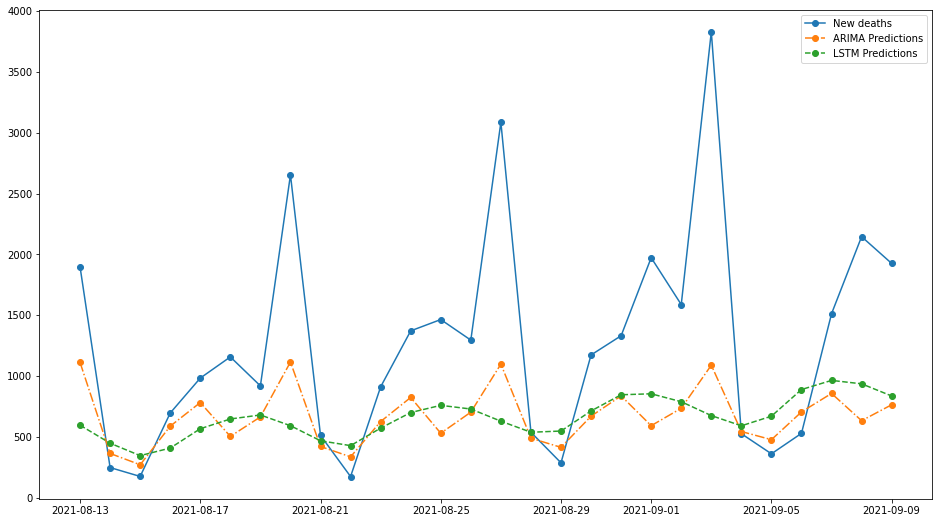

In [47]:
rmse_errors_United_States = [arima_rmse_error_United_States, lstm_rmse_error_United_States]
mse_errors_United_States = [arima_mse_error_United_States, lstm_mse_error_United_States]
errors_United_States = pd.DataFrame({"Models" : ["ARIMA", "LSTM"],"RMSE Errors" : rmse_errors_United_States, "MSE Errors" : mse_errors_United_States})
plt.figure(figsize=(16,9))
plt.plot_date(test_data_United_States.index, test_data_United_States["new_deaths"], linestyle="-",label="New deaths")
plt.plot_date(test_data_United_States.index, test_data_United_States["ARIMA_Predictions"], linestyle="-.",label="ARIMA Predictions")
plt.plot_date(test_data_United_States.index, test_data_United_States["LSTM_Predictions"], linestyle="--",label="LSTM Predictions")
plt.legend()
plt.show()


In [48]:
print(f"Mean: {test_data_United_States['new_deaths'].mean()}")
errors_United_States

Mean: 1260.107142857143


,Models,RMSE Errors,MSE Errors
0,ARIMA,923.719287,8.532573e+05
1,LSTM,1027.941997,1.056665e+06


In [49]:
test_data_United_States

,new_deaths,ARIMA_Predictions,LSTM_Predictions
date,,,
2021-08-13,1899,1113,597
2021-08-14,249,365,449
2021-08-15,176,272,347
2021-08-16,697,589,409
2021-08-17,984,783,568
2021-08-18,1158,505,648
2021-08-19,920,665,681
2021-08-20,2654,1116,593
2021-08-21,513,422,469
